1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step
Epoch 0, Discriminator Loss: 0.6968, Generator Loss: 0.6924
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


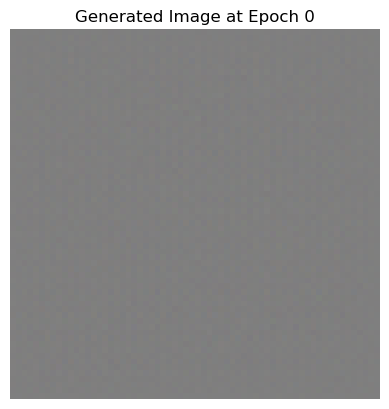

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [6]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt

latent_dim = 100
img_height = 64
img_width = 64
channels = 3

def make_generator_model(latent_dim, img_height, img_width, channels):
    generator_input = keras.Input(shape=(latent_dim,))
    x = layers.Dense(128 * (img_height // 4) * (img_width // 4))(generator_input)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Reshape(((img_height // 4), (img_width // 4), 128))(x)
    x = layers.Conv2DTranspose(128, 4, strides=2, padding='same')(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Conv2D(256, 5, padding='same')(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Conv2DTranspose(channels, 4, strides=2, padding='same', activation='tanh')(x)
    return keras.Model(generator_input, x)

def make_discriminator_model(img_height, img_width, channels):
    discriminator_input = keras.Input(shape=(img_height, img_width, channels))
    x = layers.Conv2D(128, 3, strides=2, padding='same')(discriminator_input)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Conv2D(128, 3, strides=2, padding='same')(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.4)(x)
    discriminator_output = layers.Dense(1, activation='sigmoid')(x)
    return keras.Model(discriminator_input, discriminator_output)

def load_real_images(batch_size, img_height, img_width, channels, data_path='/content/Prince Raj.png'):
    num_samples = 1000
    real_images = np.random.rand(num_samples, img_height, img_width, channels).astype(np.float32) * 2 - 1.
    indices = np.random.choice(num_samples, size=batch_size, replace=False)
    return real_images[indices]

batch_size = 32
epochs = 50

generator = make_generator_model(latent_dim, img_height, img_width, channels)
discriminator = make_discriminator_model(img_height, img_width, channels)
optimizer = keras.optimizers.Adam(0.0002, 0.5)

for epoch in range(epochs):
    real_images = load_real_images(batch_size, img_height, img_width, channels)
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_images = generator.predict(noise)

    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    with tf.GradientTape() as disc_tape:
        real_predictions = discriminator(real_images)
        fake_predictions = discriminator(generated_images)
        real_loss = keras.losses.BinaryCrossentropy(from_logits=False)(real_labels, real_predictions)
        fake_loss = keras.losses.BinaryCrossentropy(from_logits=False)(fake_labels, fake_predictions)
        discriminator_loss = 0.5 * (real_loss + fake_loss)

    gradients_of_discriminator = disc_tape.gradient(discriminator_loss, discriminator.trainable_variables)
    optimizer_disc = keras.optimizers.Adam(0.0002, 0.5)
    optimizer_disc.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    misleading_labels = np.ones((batch_size, 1))

    with tf.GradientTape() as gen_tape:
        generated_images = generator(noise)
        fake_predictions = discriminator(generated_images)
        generator_loss = keras.losses.BinaryCrossentropy(from_logits=False)(misleading_labels, fake_predictions)

    gradients_of_generator = gen_tape.gradient(generator_loss, generator.trainable_variables)
    optimizer_gen = keras.optimizers.Adam(0.0002, 0.5)
    optimizer_gen.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {discriminator_loss:.4f}, Generator Loss: {generator_loss:.4f}")
        noise = np.random.normal(0, 1, (1, latent_dim))
        generated_image = generator.predict(noise)[0]
        generated_image = (generated_image + 1) / 2.0
        keras.utils.save_img(f"generated_image_epoch_{epoch}.png", generated_image)
        plt.imshow(generated_image)
        plt.axis('off')
        plt.title(f"Generated Image at Epoch {epoch}")
        plt.show()

print("Training finished. Check generated_image_*.png files.")

